In [1]:
import numpy as np
import pandas as pd
import scanpy as sc


import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl


import sklearn.decomposition, sklearn.cluster
from nheatmap import nhm, scripts
import matplotlib.pyplot as plt
import matplotlib as mpl


import os

#For editable text. Except latex text is still shapes
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
sns.set_style("whitegrid")
font = {'size' : 6}
lines = {'linewidth' : 0.5}
fig = {'figsize' : (2.5, 1.5)}
mpl.rc('font', **font)
mpl.rc('lines', **lines)
mpl.rc('figure', **fig)

#Set style
sns.set(style = "whitegrid", palette="pastel", color_codes=True)

# 03142021_suppFig9B_vizPlacentaMarkers_SURYAWANSHI.ipynb

In [2]:
def save_figure_pdf(fig, path_to_save):
	'''
	Utility fxn to save a figure without having to retype all the required options.
	Input:
		fig - a matplotlib.pyplot.figure instance with the figure you'd like to save
		path_to_save - the path you'd like to save the figure to
	Returns: Nothing but there should now be a pdf version in 300 dpi with a transparent bkg at path_to_save
	'''
	fig.savefig(path_to_save, dpi = 150, 
                bbox_inches = 'tight', transparent = True)

In [3]:
# read in adata and normalize

adata = sc.read_h5ad("../../../livertox/placenta-hemant.h5ad")
sc.pp.normalize_total(adata, target_sum = 1e4)
sc.pp.log1p(adata)

In [4]:
markers = pd.read_csv("../../signatures_git/placenta_signature_forCIS_UNITED-TIECH-HEMANT_010120201.csv",
                           sep = ",", index_col = 0).T

In [5]:
degDict = {}
for i in markers:
    cellName = i.split("-")[0]
    degDict[cellName] = markers[i].dropna().tolist()

In [6]:
degDict

{'EVT': ['ASCL2',
  'CLDN19',
  'CSH1',
  'EBI3',
  'HLA-G',
  'HTRA4',
  'IL1RAP',
  'LAIR2',
  'NOTUM',
  'VGLL3'],
 'SCT': ['CYP19A1', 'EPS8L1', 'ERVFRD-1', 'KMO', 'LGALS16', 'SERPINB2']}

In [7]:
allMarkers = list(degDict.values())
allMarkers = [j for sub in allMarkers for j in sub] 

In [8]:
cellObsCol = "ClusterName"

In [9]:
adata = adata[:, allMarkers]

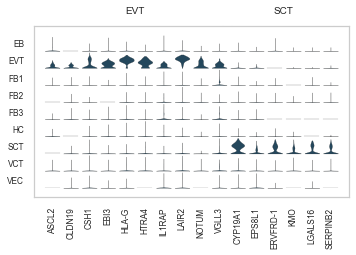

In [10]:
sc.pl.stacked_violin(adata, degDict,
                     color = "#1b4965",
                     groupby = cellObsCol,
                    save = "placenta_signature_hemant_03142021.pdf")

In [11]:
clear all